In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math

In [2]:
df = pd.read_csv("/kaggle/input/ASNA-hackathon/train.csv")
df_test = pd.read_csv("/kaggle/input/ASNA-hackathon/test.csv")
sample = pd.read_csv("/kaggle/input/ASNA-hackathon/sample_submission.csv")

In [3]:
df.head()

,CustomerID,State,Customer Lifetime Value,Response,Coverage,Coverage Index,Education,Education Index,Effective To Date,Employment Status,...,Policy Type,Policy Type Index,Policy,Policy Index,Renew Offer Type,Sales Channel,Sales Channel Index,Vehicle Size,Vehicle Size Index,Claim over 1k
0,QC35222,California,3622.69,No,Basic,0,Bachelor,2,1/1/2024,Employed,...,Corporate Auto,1,Corporate L2,4,3,Web,0,Medsize,1,0
1,AE98193,Washington,10610.21,No,Basic,0,High School or Below,0,1/1/2024,Unemployed,...,Personal Auto,0,Personal L1,0,1,Branch,1,Medsize,1,1
2,TM23514,Oregon,13868.02,No,Extended,1,College,1,1/1/2024,Employed,...,Personal Auto,0,Personal L3,2,3,Web,0,Medsize,1,0
3,QZ42725,Washington,3119.69,No,Basic,0,Bachelor,2,1/1/2024,Unemployed,...,Personal Auto,0,Personal L3,2,2,Agent,2,Medsize,1,0
4,SG81493,Arizona,5999.04,No,Premium,2,Bachelor,2,1/1/2024,Employed,...,Corporate Auto,1,Corporate L1,3,2,Web,0,Medsize,1,0


In [4]:
df_test.head()

,CustomerID,State,Customer Lifetime Value,Response,Coverage,Coverage Index,Education,Education Index,Effective To Date,Employment Status,...,Number of Policies,Policy Type,Policy Type Index,Policy,Policy Index,Renew Offer Type,Sales Channel,Sales Channel Index,Vehicle Size,Vehicle Size Index
0,WB38524,California,4008.95,No,Basic,0,High School or Below,0,1/1/2024,Employed,...,1,Personal Auto,0,Personal L3,2,2,Branch,1,Small,0
1,QP80741,Washington,8165.58,No,Basic,0,College,1,1/1/2024,Unemployed,...,2,Corporate Auto,1,Corporate L1,3,3,Agent,2,Medsize,1
2,WP41146,California,7210.94,No,Basic,0,High School or Below,0,1/1/2024,Unemployed,...,7,Personal Auto,0,Personal L2,1,1,Branch,1,Medsize,1
3,KR62797,Arizona,6198.70,No,Basic,0,High School or Below,0,1/1/2024,Employed,...,1,Personal Auto,0,Personal L2,1,2,Call Center,3,Medsize,1
4,VE55982,Nevada,3570.32,No,Basic,0,Bachelor,2,1/1/2024,Employed,...,1,Corporate Auto,1,Corporate L1,3,1,Call Center,3,Medsize,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     7290 non-null   object 
 1   State                          7290 non-null   object 
 2   Customer Lifetime Value        7290 non-null   float64
 3   Response                       7290 non-null   object 
 4   Coverage                       7290 non-null   object 
 5   Coverage Index                 7290 non-null   int64  
 6   Education                      7290 non-null   object 
 7   Education Index                7290 non-null   int64  
 8   Effective To Date              7290 non-null   object 
 9   Employment Status              7290 non-null   object 
 10  Employment Status Index        7290 non-null   int64  
 11  Gender                         7290 non-null   object 
 12  Income                         7290 non-null   i

In [6]:
df.describe()

,Customer Lifetime Value,Coverage Index,Education Index,Employment Status Index,Income,Marital Status Index,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type Index,Policy Index,Renew Offer Type,Sales Channel Index,Vehicle Size Index,Claim over 1k
count,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000
mean,10798.116623,0.490261,1.287243,0.985597,50573.282579,0.878189,20.514678,65.164335,0.379287,2.978875,0.300000,2.216735,1.964472,1.622497,0.913717,0.114129
std,9180.878153,0.658827,1.079150,0.910412,41090.968142,0.638740,13.626412,37.656121,0.903361,2.404229,0.543978,1.785506,1.004708,0.956533,0.534543,0.317990
min,2562.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5374.027500,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,32.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,7845.015000,0.000000,1.000000,1.000000,45398.500000,1.000000,19.000000,65.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000,0.000000
75%,12152.585000,1.000000,2.000000,1.000000,83655.750000,1.000000,31.000000,96.000000,0.000000,4.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000
max,100208.500000,2.000000,4.000000,4.000000,134947.000000,2.000000,47.000000,134.000000,5.000000,9.000000,2.000000,8.000000,4.000000,3.000000,2.000000,1.000000


In [7]:
df.shape

(7290, 29)

In [8]:
df.isna().sum()

CustomerID                       0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Coverage Index                   0
Education                        0
Education Index                  0
Effective To Date                0
Employment Status                0
Employment Status Index          0
Gender                           0
Income                           0
Marital Status                   0
Marital Status Index             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy Type Index                0
Policy                           0
Policy Index                     0
Renew Offer Type                 0
Sales Channel                    0
Sales Channel Index              0
Vehicle Size                     0
Vehicle Size Index               0
Claim over 1k       

# EDA

In [9]:
df['Claim over 1k'].value_counts()

Claim over 1k
0    6458
1     832
Name: count, dtype: int64

In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns
categoric_cols = df.select_dtypes(exclude=['number']).columns

In [11]:
indexed_cols_pairs = []
indexed_cols = []
for cat_col in categoric_cols:
    for num_col in numeric_cols:
        if cat_col + ' Index' == num_col:
            indexed_cols_pairs.append([num_col, cat_col])
            indexed_cols.append(num_col)

non_index_cols = ['State', 'Response', 'Gender']
actual_numeric_cols = [col for col in numeric_cols if col not in indexed_cols]
print('Already indexed', len(indexed_cols))
print(indexed_cols)
print('Not indexed', len(indexed_cols))
print(non_index_cols)
print('Not indexed', len(non_index_cols))
print(actual_numeric_cols)
print('Actual numeric', len(actual_numeric_cols))

Already indexed 8
['Coverage Index', 'Education Index', 'Employment Status Index', 'Marital Status Index', 'Policy Type Index', 'Policy Index', 'Sales Channel Index', 'Vehicle Size Index']
Not indexed 8
['State', 'Response', 'Gender']
Not indexed 3
['Customer Lifetime Value', 'Income', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type', 'Claim over 1k']
Actual numeric 8


## Categorical

In [12]:
def plot_bar_charts(df, columns):
    num_columns = len(columns)
    num_rows = math.ceil(num_columns / 3)
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        value_counts = df[col].value_counts()

        sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=axes[i])

        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].set_title(f'{col} Distribution')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

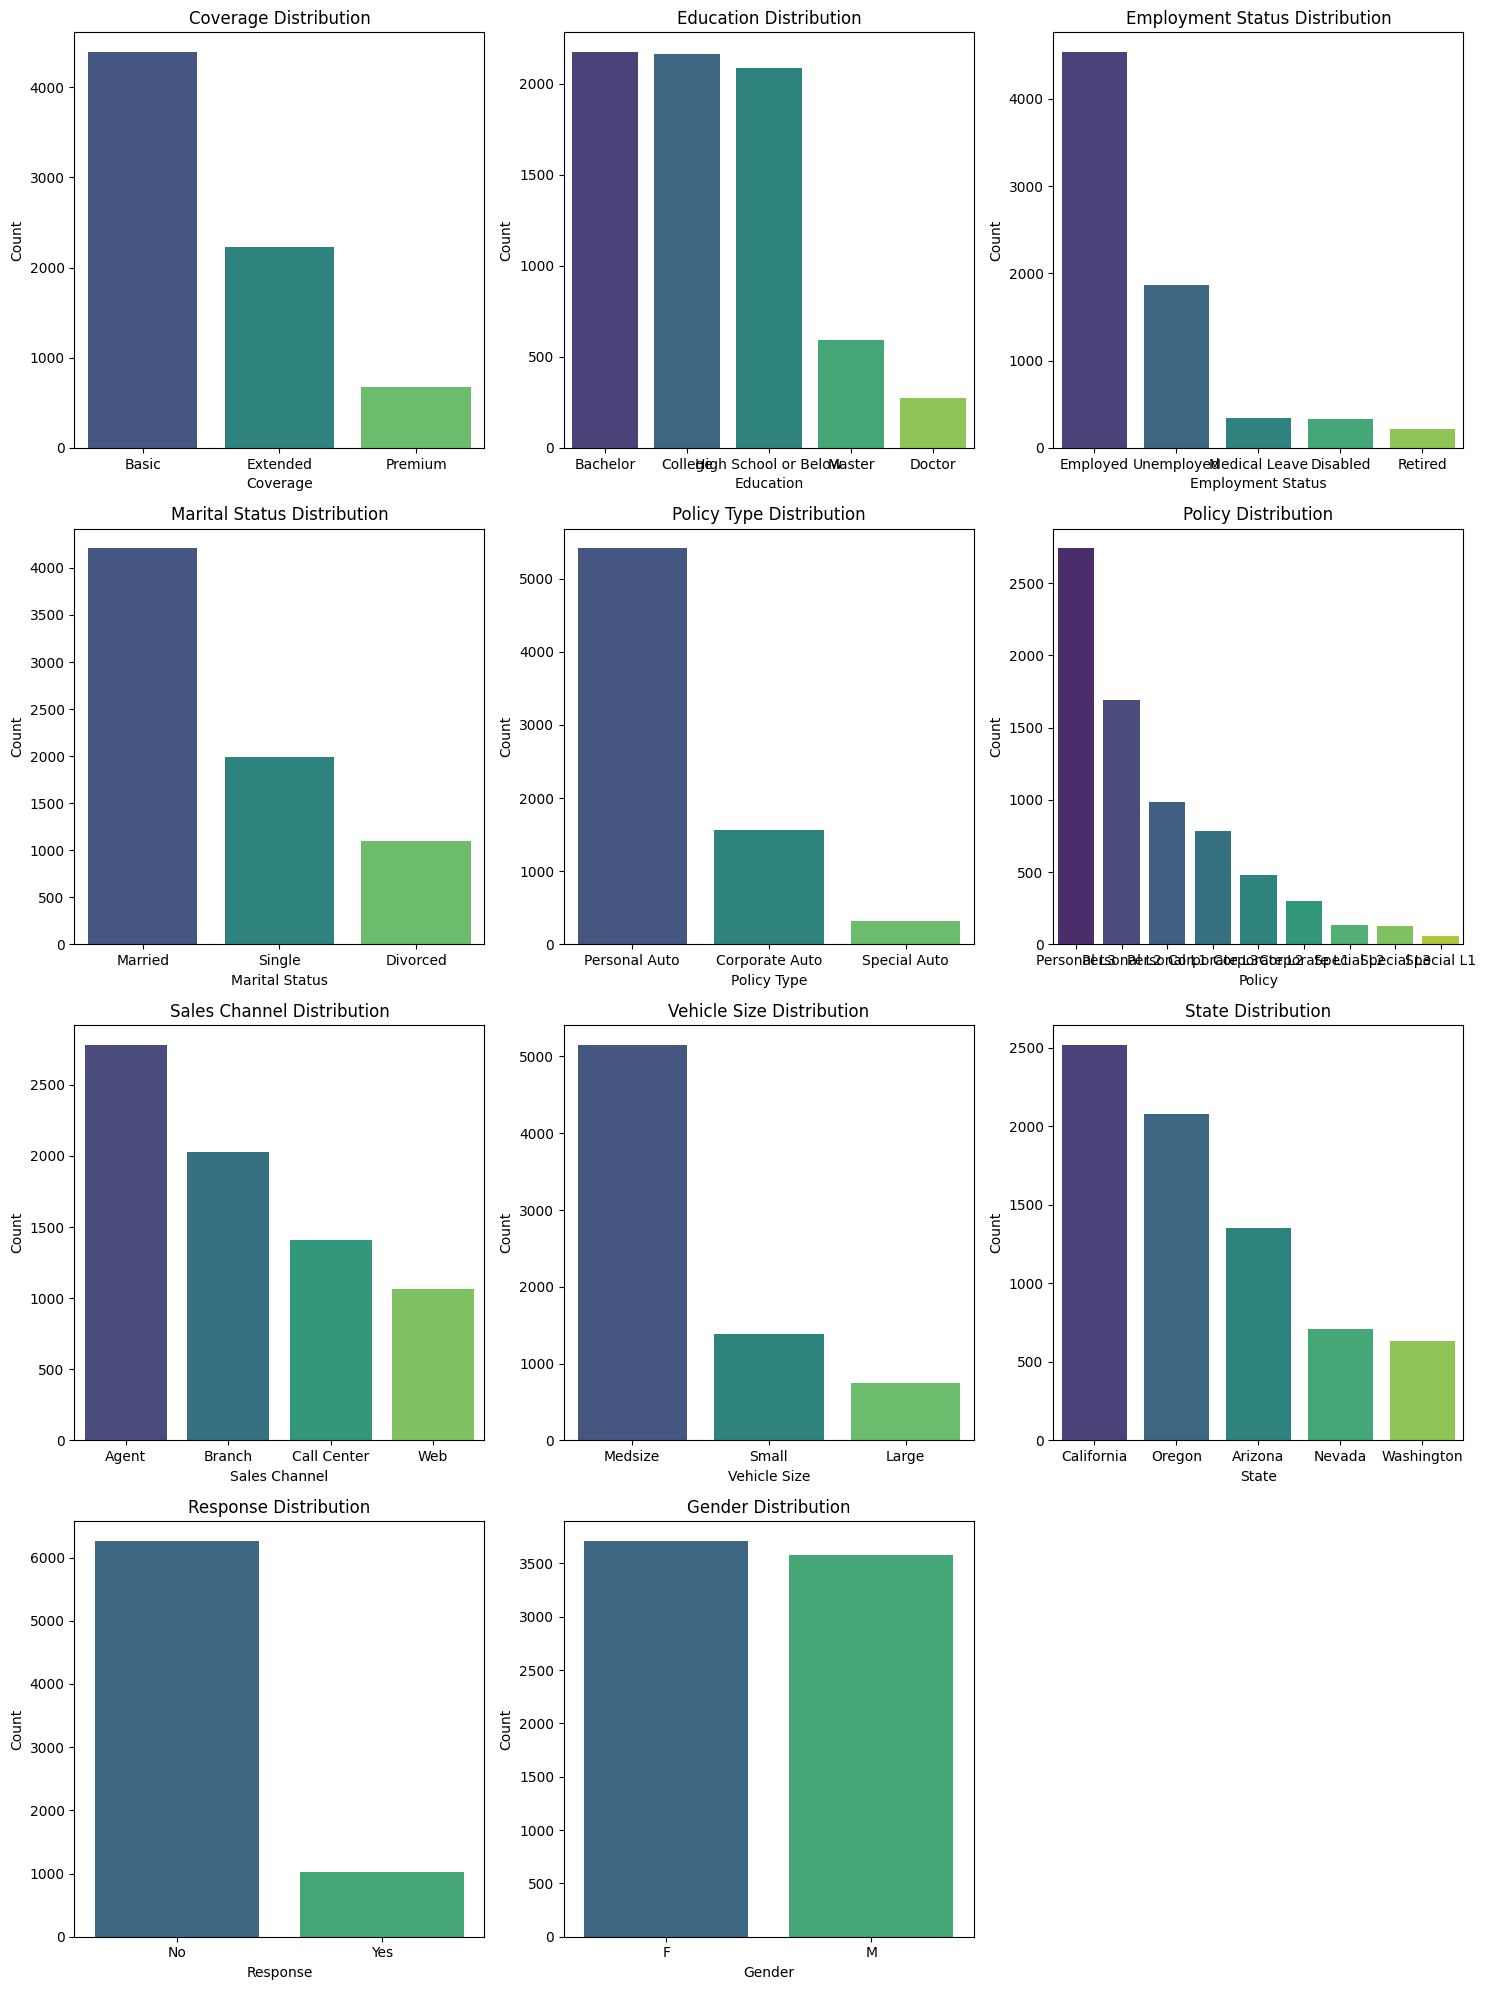

In [13]:
plot_bar_charts(df, [col[1] for col in indexed_cols_pairs] + non_index_cols)

In [14]:
for idx_col in indexed_cols_pairs:
    print(df[idx_col].value_counts())

Coverage Index  Coverage
0               Basic       4387
1               Extended    2232
2               Premium      671
Name: count, dtype: int64
Education Index  Education           
2                Bachelor                2175
1                College                 2163
0                High School or Below    2086
3                Master                   593
4                Doctor                   273
Name: count, dtype: int64
Employment Status Index  Employment Status
1                        Employed             4536
0                        Unemployed           1868
2                        Medical Leave         338
4                        Disabled              329
3                        Retired               219
Name: count, dtype: int64
Marital Status Index  Marital Status
1                     Married           4208
0                     Single            1985
2                     Divorced          1097
Name: count, dtype: int64
Policy Type Index  Policy Type   


In [15]:
df[non_index_cols]

,State,Response,Gender
0,California,No,F
1,Washington,No,M
2,Oregon,No,M
3,Washington,No,F
4,Arizona,No,M
...,...,...,...
7285,California,No,F
7286,California,No,F
7287,California,No,F
7288,California,No,F


In [16]:
df['State'].value_counts()

State
California    2520
Oregon        2077
Arizona       1353
Nevada         708
Washington     632
Name: count, dtype: int64

In [17]:
df['Response'].value_counts()

Response
No     6265
Yes    1025
Name: count, dtype: int64

In [18]:
df['Gender'].value_counts()

Gender
F    3711
M    3579
Name: count, dtype: int64

## Numeric

In [19]:
print(actual_numeric_cols)
print('Actual numeric', len(actual_numeric_cols))

['Customer Lifetime Value', 'Income', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type', 'Claim over 1k']
Actual numeric 8


In [20]:
def plot_eachfeature(graph_type):
    fig, axes = plt.subplots(nrows=2, ncols=int(len(actual_numeric_cols)/2), figsize=(20,16))

    axes = axes.flatten()

    for i in range(len(actual_numeric_cols)):
        graph_type(df[actual_numeric_cols[i]], ax=axes[i])
        axes[i].set_xlabel(actual_numeric_cols[i])

    fig.tight_layout()
    plt.show()

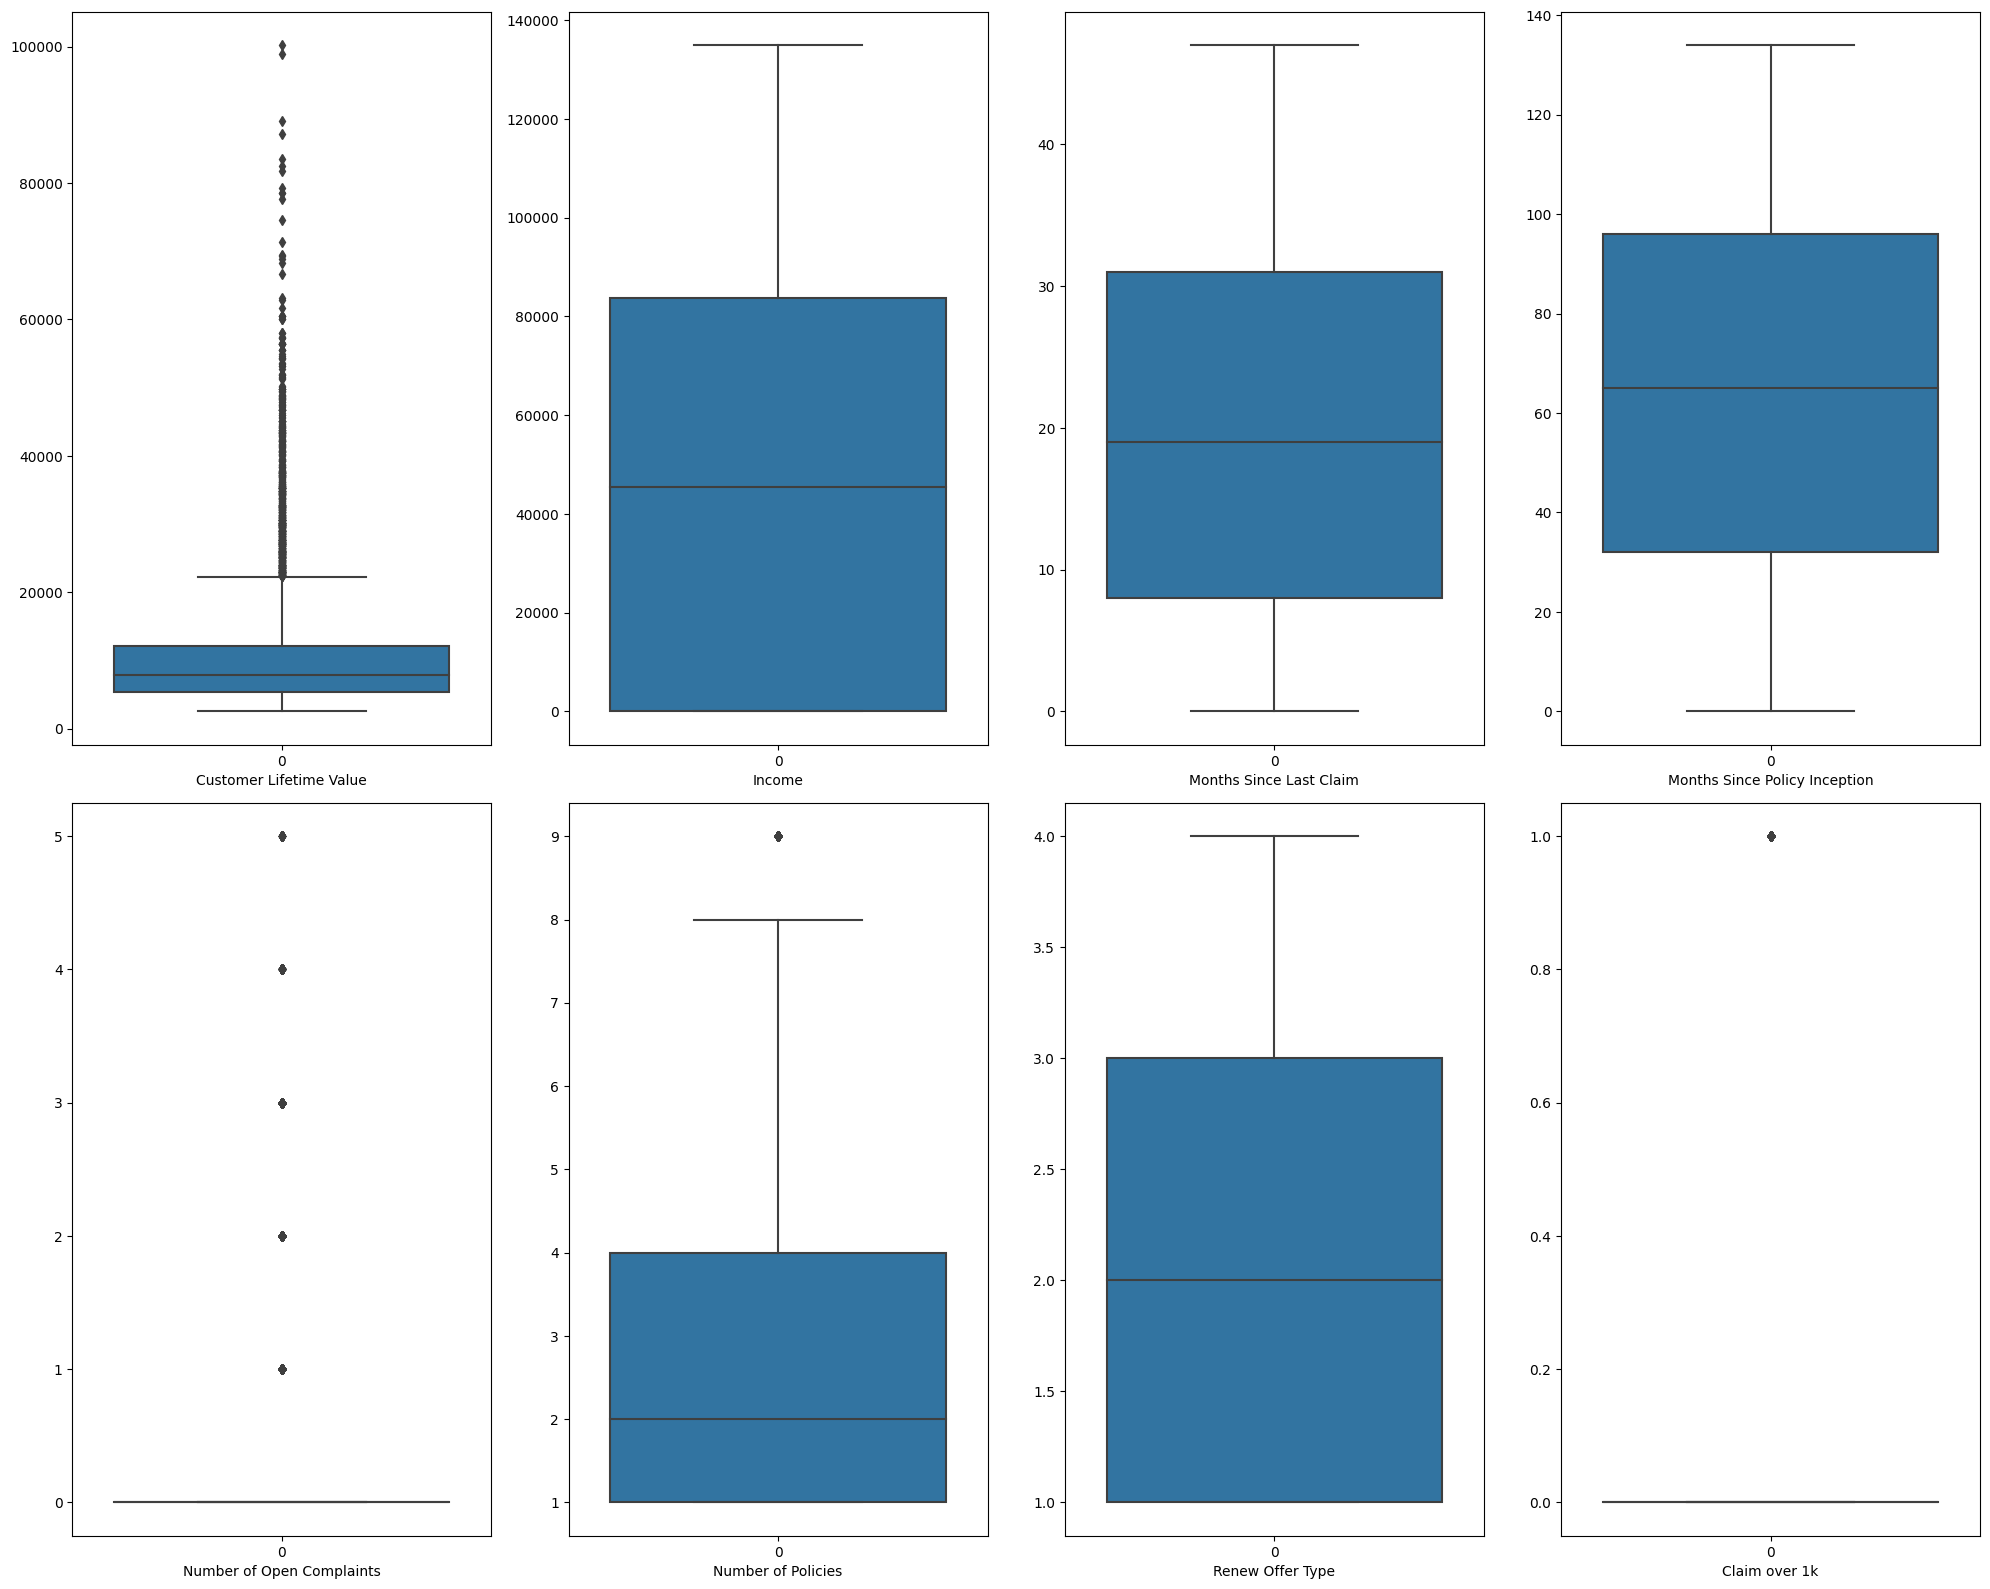

In [21]:
plot_eachfeature(sns.boxplot)

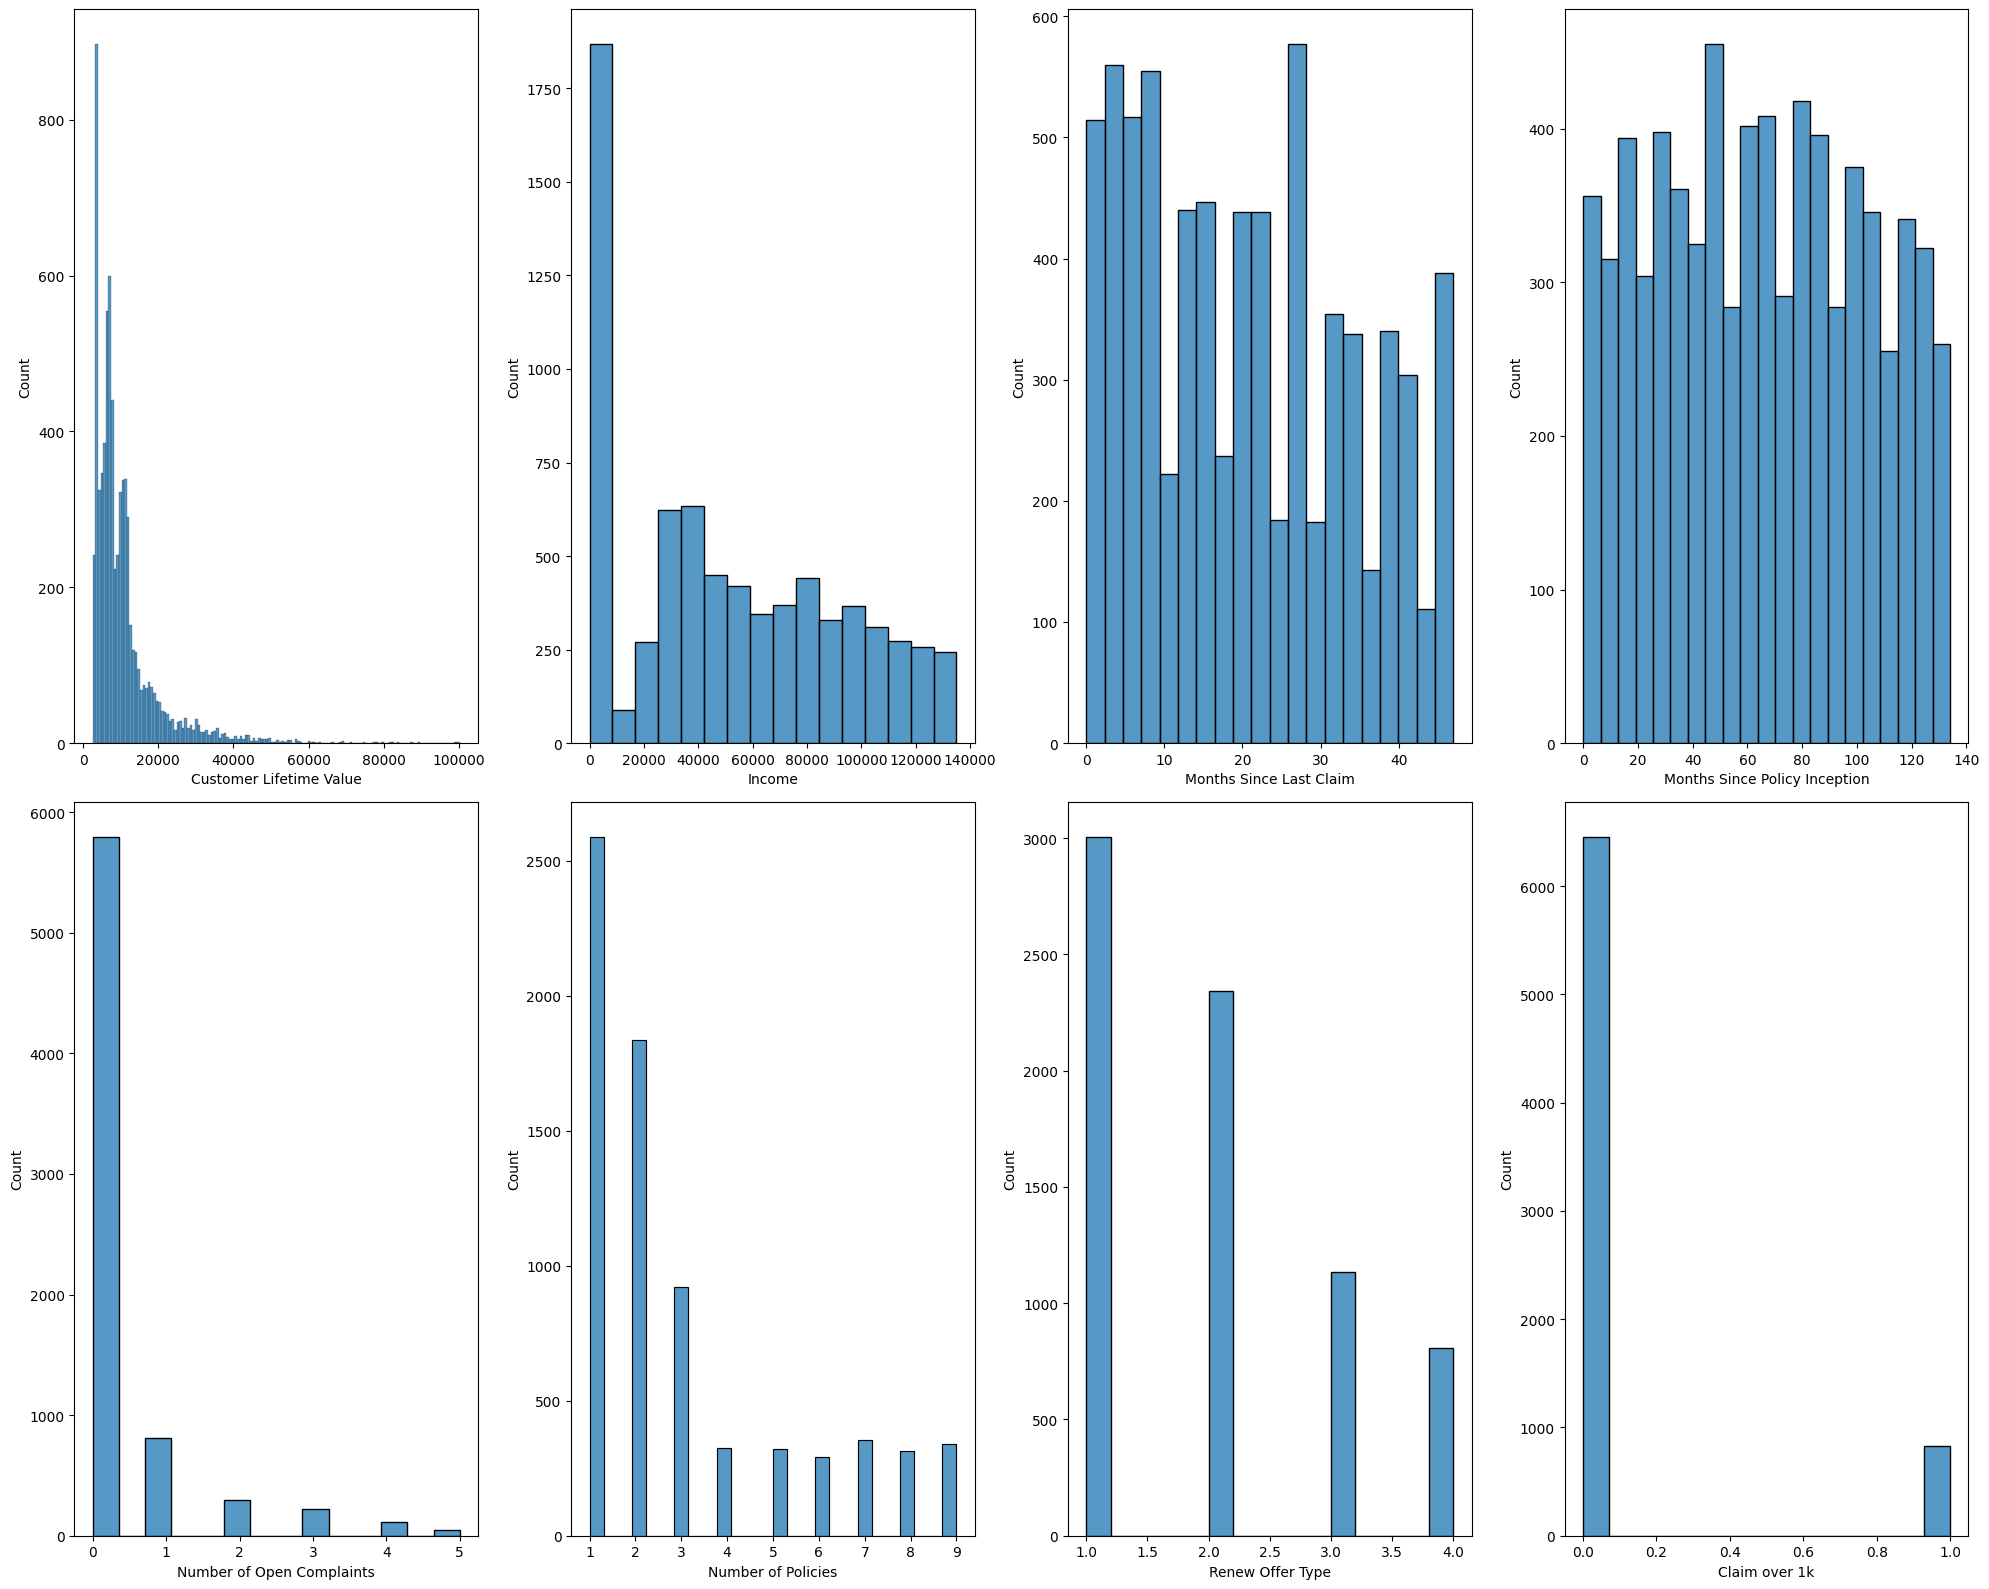

In [22]:
warnings.filterwarnings("ignore")
plot_eachfeature(sns.histplot)

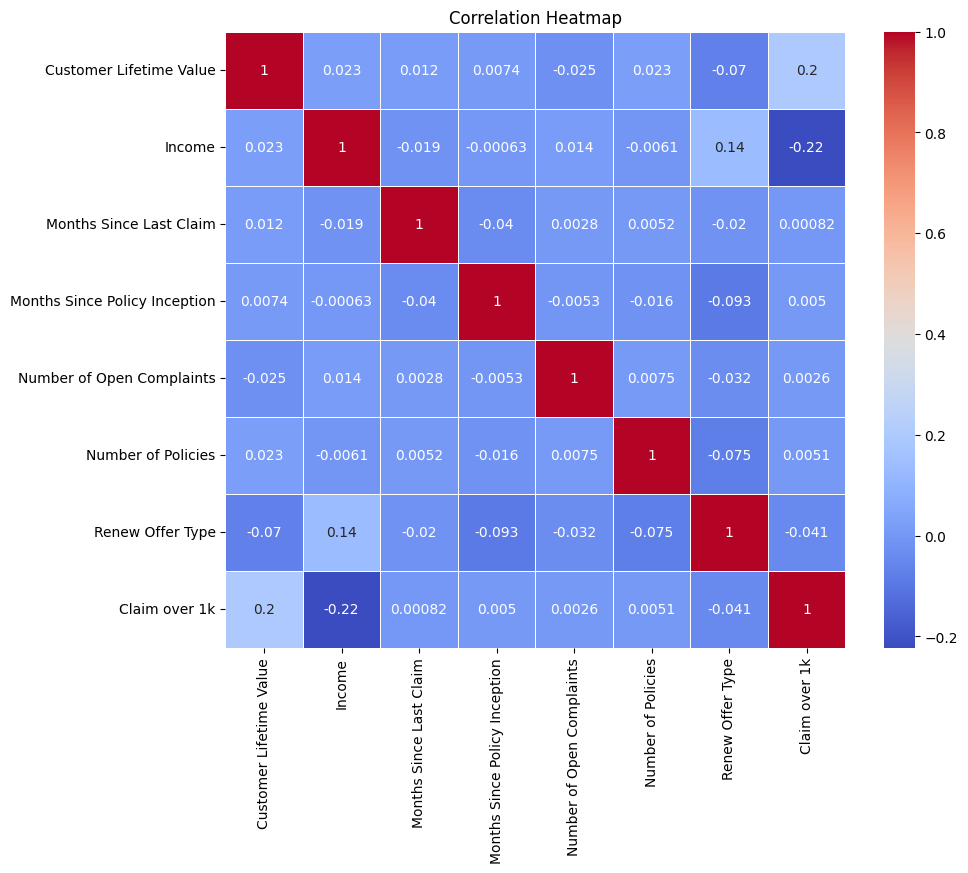

In [23]:
corr_matrix = df[actual_numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Modeling

In [24]:
for col in categoric_cols:
    df[col] = df[col].astype('category')
    df_test[col] = df_test[col].astype('category')

In [25]:
from sklearn.utils import resample
X = df[list(df.columns)[:-1]]
y = df[['Claim over 1k']]
X_majority = X[df['Claim over 1k'] == 0]
y_majority = y[df['Claim over 1k'] == 0]
X_minority = X[df['Claim over 1k'] == 1]
y_minority = y[df['Claim over 1k'] == 1]
X_minority_upsampled, y_minority_upsampled = resample(X_minority, y_minority, 
                                                      replace=True, 
                                                      n_samples=X_majority.shape[0],
                                                      random_state=1)
X_bal = pd.concat([X_majority, X_minority_upsampled])
y_bal = pd.concat([y_majority, y_minority_upsampled])
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10332, 28), (10332, 1), (2584, 28), (2584, 1))

In [27]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [28]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(max_depth=3, n_jobs=-1, n_estimators=500, learning_rate=0.3)
lgbm.fit(X_train, y_train)
y_hat = lgbm.predict(X_test)
accuracy_score(y_hat, y_test)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5181, number of negative: 5151
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1617
[LightGBM] [Info] Number of data points in the train set: 10332, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501452 -> initscore=0.005807
[LightGBM] [Info] Start training from score 0.005807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

0.9860681114551083

In [29]:
X.shape, df_test.shape

((7290, 28), (1844, 28))

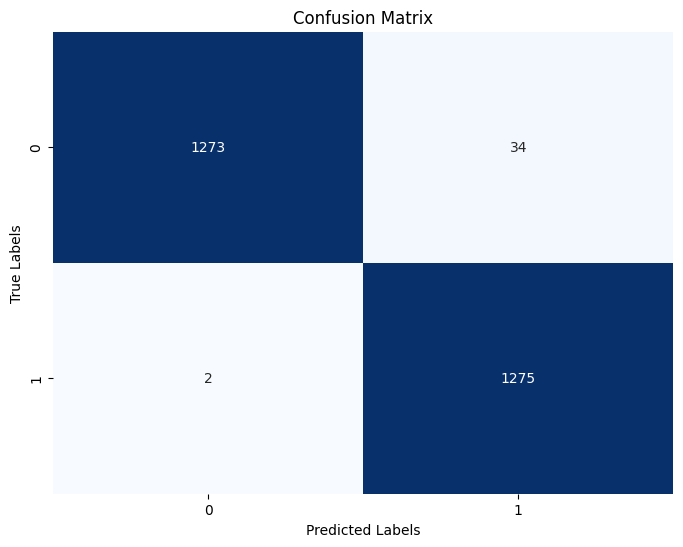

In [30]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_hat)
conf_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:
lgbm = lgb.LGBMClassifier(max_depth=3, n_jobs=-1, n_estimators=500, learning_rate=0.3)
lgbm.fit(X_bal, y_bal)
pred = lgbm.predict(df_test)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6458, number of negative: 6458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 12916, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [32]:
submit_csv = pd.DataFrame({'CustomerID': list(df_test['CustomerID'].values),
             'Claim over 1k': pred}).set_index('CustomerID')

In [33]:
submit_csv.to_csv('submit.csv')